# Data Analysis Visualization

## General Plot

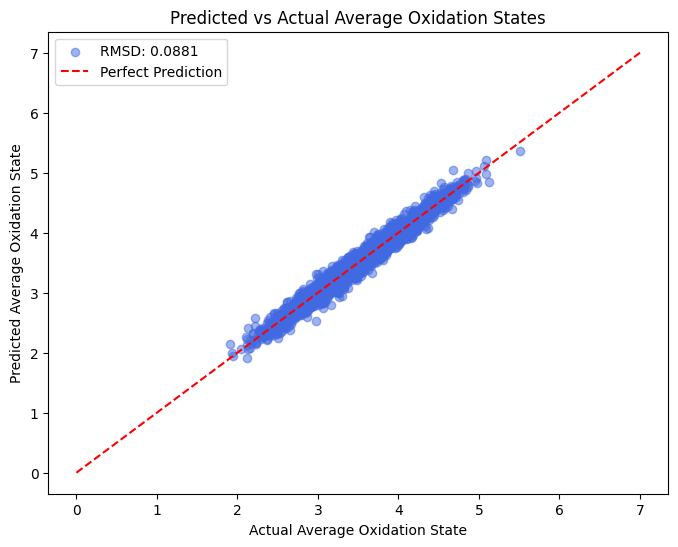

0.08814782921029311

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def plot_predicted_vs_actual(predicted_matrix, actual_matrix):
    """
    Plot predicted vs. actual average oxidation states and calculate RMSD.

    Parameters:
        predicted_matrix (numpy.ndarray): 4000x8 matrix of predicted normalized oxidation states (0-1).
        actual_matrix (numpy.ndarray): 4000x8 matrix of actual normalized oxidation states (0-1).
    Returns:
        float: RMSD (Root Mean Square Deviation) between predicted and actual oxidation states.
    """
    assert predicted_matrix.shape == actual_matrix.shape, "Predicted and actual matrices must have the same shape."
    assert predicted_matrix.shape[1] == 8, "Each matrix must have 8 columns for oxidation states."
    
    # Define the oxidation states: [0, 1, 2, ..., 7]
    oxidation_states = np.arange(8).reshape(-1, 1)  # Shape: (8, 1)
    
    # Compute the average oxidation states for each sample
    predicted_avg = np.dot(predicted_matrix, oxidation_states).flatten()  # Shape: (4000,)
    actual_avg = np.dot(actual_matrix, oxidation_states).flatten()        # Shape: (4000,)
    
    # Calculate RMSD
    rmsd = np.sqrt(mean_squared_error(actual_avg, predicted_avg))
    
    # Plot predicted vs. actual
    plt.figure(figsize=(8, 6))
    plt.scatter(actual_avg, predicted_avg, alpha=0.5, label=f'RMSD: {rmsd:.4f}', color='royalblue')
    plt.plot([0, 7], [0, 7], color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel('Ground Truth Oxidation State')
    plt.ylabel('Predicted Average Oxidation State')
    plt.title('Predicted vs Ground Truth Oxidation States')
    plt.legend()
    plt.show()
    
    return rmsd


## Error Histogram (overall)

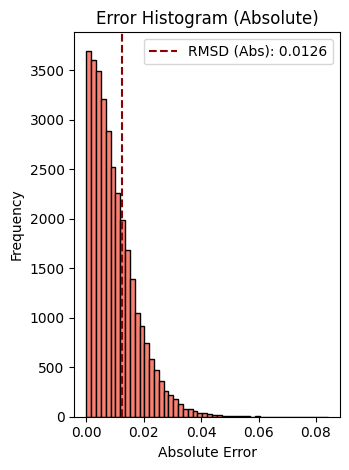

In [19]:
def plot_error_histogram(predicted_matrix, actual_matrix, bins=50):
    """
    Plot a histogram of the errors between predicted and actual matrices.

    Parameters:
        predicted_matrix (numpy.ndarray): Predicted values (4000x8).
        actual_matrix (numpy.ndarray): Actual values (4000x8).
        bins (int): Number of bins for the histogram.
    """
    # Calculate the element-wise error
    error = predicted_matrix - actual_matrix  # Raw error
    absolute_error = np.abs(error)            # Absolute error
    
    # Flatten the error matrices for histogram plotting
    abs_error_flat = absolute_error.flatten()
    
    # Calculate RMSD for absolute error
    rmsd_abs = np.sqrt(np.mean(abs_error_flat**2))  # RMSD for absolute error

    # Plot the absolute error histogram
    plt.subplot(1, 2, 2)  # Second subplot for absolute errors
    plt.hist(abs_error_flat, bins=bins, color='salmon', edgecolor='black')
    plt.title('Error Histogram (Absolute)')
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')
    
    plt.axvline(rmsd_abs, color='darkred', linestyle='--', label=f'RMSD (Abs): {rmsd_abs:.4f}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return 

# Example input matrices (normalized)
np.random.seed(42)
actual_matrix = np.random.rand(4000, 8)
predicted_matrix = actual_matrix + np.random.normal(0, 0.05, size=(4000, 8))
predicted_matrix = np.clip(predicted_matrix, 0, 1)

# Normalize rows to sum to 1
actual_matrix /= actual_matrix.sum(axis=1, keepdims=True)
predicted_matrix /= predicted_matrix.sum(axis=1, keepdims=True)

# Call the function
plot_error_histogram(predicted_matrix, actual_matrix)

## Error Histogram (each oxidation state)

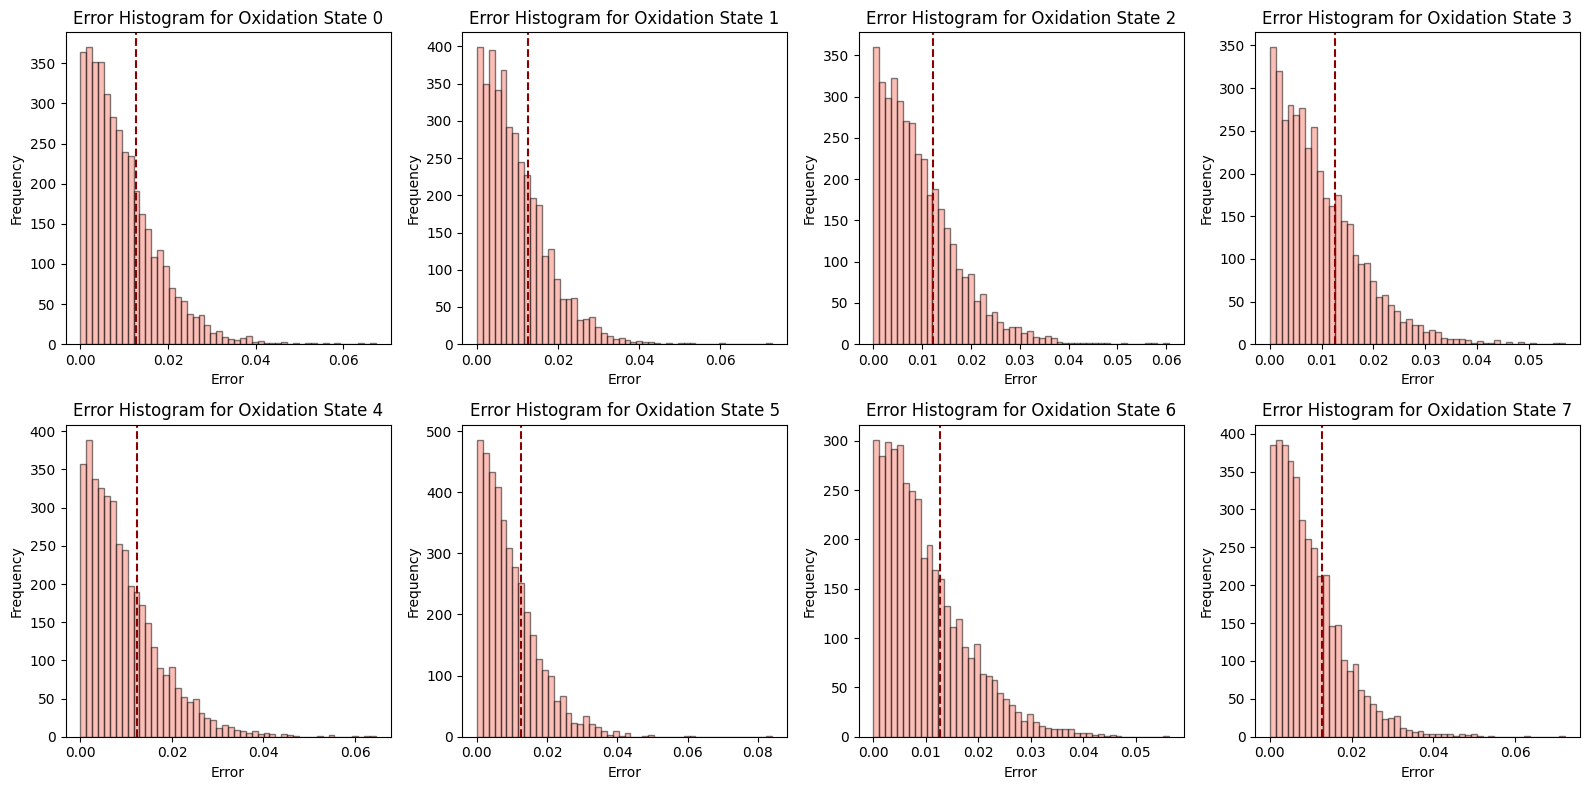

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_oxidation_state_error_histograms(predicted_matrix, actual_matrix, bins=50):
    """
    Plot histograms of errors for each oxidation state (0-7) separately.

    Parameters:
        predicted_matrix (numpy.ndarray): Predicted values (4000x8).
        actual_matrix (numpy.ndarray): Actual values (4000x8).
        bins (int): Number of bins for the histograms.
    """
    # Calculate the element-wise error for each oxidation state
    error = predicted_matrix - actual_matrix  # Raw error
    absolute_error = np.abs(error)            # Absolute error

    # Prepare for plotting histograms for each oxidation state (0-7)
    oxidation_states = np.arange(8)
    
    # Create subplots
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows and 4 columns of subplots
    axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing
    
    for i, oxidation_state in enumerate(oxidation_states):
        # Extract the error for the current oxidation state (for all samples)
        predicted_oxidation = predicted_matrix[:, oxidation_state]
        actual_oxidation = actual_matrix[:, oxidation_state]
        
        # Calculate raw and absolute errors for the current oxidation state
        error_oxidation = predicted_oxidation - actual_oxidation
        absolute_error_oxidation = np.abs(error_oxidation)
        
        # Plot the error histogram for the current oxidation state
        axes[i].hist(absolute_error_oxidation, bins=bins, color='salmon', edgecolor='black', alpha=0.5)
        axes[i].set_title(f'Error Histogram for Oxidation State {oxidation_state}')
        axes[i].set_xlabel('Error')
        axes[i].set_ylabel('Frequency')
        
        
        # Calculate RMSD for absolute error
        rmsd_abs = np.sqrt(np.mean(absolute_error_oxidation**2))  # RMSD for absolute error

        # Add vertical lines for RMSD
        axes[i].axvline(rmsd_abs, color='darkred', linestyle='--', label=f'RMSD (Abs): {rmsd_abs:.4f}')


    # Adjust layout
    plt.tight_layout()
    plt.show()

    return 

# Example input matrices (normalized)
np.random.seed(42)
actual_matrix = np.random.rand(4000, 8)
predicted_matrix = actual_matrix + np.random.normal(0, 0.05, size=(4000, 8))
predicted_matrix = np.clip(predicted_matrix, 0, 1)

# Normalize rows to sum to 1
actual_matrix /= actual_matrix.sum(axis=1, keepdims=True)
predicted_matrix /= predicted_matrix.sum(axis=1, keepdims=True)

# Call the function
plot_oxidation_state_error_histograms(predicted_matrix, actual_matrix)


## Confusion Matrix of Integer Valence States